# SVM for classification
This implements SVM to solve binary classification problems.  
We minimize hinge loss function with penalty term:  
$$min \sum_{i=1}^mmax(0,1-yi*(w^T*xi+b))+\rho*(w^T*w)$$

#### Notations
w = [w1, w2, ...， wn]  
xi = [\\(x^{(1)}\\), \\(x^{(2)}\\), ...\\(x^{(n)}\\),] where n is the feature dimention    
yi = -1 or 1   
Training set is {(X,Y)} where X = [x1,x2, ..., xm] and Y = [y1, y2 ...,ym] where m is the sample size.
## Stochatic subgradient descent for SVM

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#define some vector operations
def dot(x, y):
    'dot-multiplication of two vectors'
    return sum([a*b for a, b in zip(x,y)])
    
def multi(c, y):
    'Constant multiplies vector'
    return [c*a for a in y]
    
def subtract(x, y):
    'subtraction of two vectors x-y'
    return [a-b for a, b in zip(x,y)]    

### Define function to get subgradient
Note that the gradient is of n+1 dimension

In [3]:
def subgradient(w, b, rho, x, y):
    'get subgradient of loss func = max(0,1-yi*(w^T*xi+b))+\rho*(w^T*w)'
    #Note SGD only choose one sample (x,y) to get subgradient
    #x is a vector, y is value -1 or 1
    if 1-y*(dot(w, x)+b)>0:
        g = multi(-y,x)+2*multi(rho,w)
        g.append(-y)
    else:
        g = 2*multi(rho,w)
        g.append(0)
    return g

### Define Stochastic subgradient descient method
There are two stop strategies (modify e to select):
* Stop at iteration N (set e = 0)
* Stop when the l2-norm of parameter's difference is less than the threshold e or iteration N is reached(set e > 0)

In [4]:
def SSGD(w0, b0, rho, lr, N, X, Y, e = 0):
    'get w, b, iteration; can choose to stop iteration at e threshold or run full iteration(set e=0)'
    #lr: learning rate    
    #N: maximum number of iterations
    #e: threshold to check convergence
    #TODO output learning curve
    w = w0
    b = b0
    for i in range(N):
        #randomly choose one sample
        k = random.randint(0, len(Y)-1)
        x = X[k]
        y = Y[k]
        #get subgradient
        g = subgradient(w, b, rho, x, y)
        #update w, b
        w_old = w
        b_old = b
        w = subtract(w, multi(lr, g[:-1]))
        b = b-lr*g[-1]
        #get l2-norm of (w, b)'s difference
        delta = subtract(w, w_old) + [b-b_old]
        norm_delta = sum([x*x for x in delta])
        if e != 0 and norm_delta<e:   #less than threshold
            print('Converge after {} iterations with threshold {}'.format(i+1, e))
            return w, b, i+1
    if e != 0:
        print('Fail to converge in {} iterations with threshold {}'.format(i+1, e))
    return w, b, i+1

## Test
### Data generation: 100 samples with 2 features

In [5]:
X = [[random.uniform(0,3), random.uniform(0,3)] for i in range(100)]
gen_w = [1,2]
gen_b = -4.5
Y = []
for x in X:
    if dot(gen_w, x)+gen_b>0:
        Y.append(1)
    else:
        Y.append(-1)

### Configure and train

In [6]:
w0 = [0, 0]
b0 = 0
rho = 0.1
lr = 0.01    
N = 100000
#e = 0.000001
w, b, iteration = SSGD(w0, b0, rho, lr, N, X, Y)

### Result and visualization

In [7]:
print('w = {} and b = {}'.format(w, b))

w = [0.7035781750306512, 1.7450579759397062] and b = -3.5899999999999674


G:\installed\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


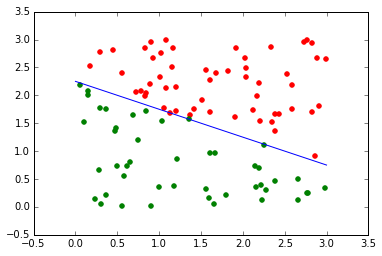

In [8]:
#visulization
X = np.array(X)
Y = np.array(Y)
plt.scatter(X[Y == 1].transpose()[0], X[Y == 1].transpose()[1], color = 'r')
plt.scatter(X[Y == -1].transpose()[0], X[Y == -1].transpose()[1], color = 'g')
plt.plot(np.array([0,3]), np.array([2.25-0.5*0, 2.25-0.5*3]), color = 'b')
plt.show()